# SPREAD LOCATOR PROJECT - Statistical Distribution Analysis

## IMPORT LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import bernoulli, binom, poisson, lognorm
from scipy.stats import zscore

## LOAD DATASET

In [25]:
df = pd.read_csv("spread_locator_dataset.csv.csv")
df.head(1)

,transaction_id,customer_id,transaction_amount,transaction_date,transaction_count,region,transaction_status
0,e98aa092-3770-4fdb-9502-5b5a6a244811,CUST2824,3821.34,2023-01-26,3,North,Fail


## BERNOULLI DISTRIBUTION

Probability of Success: 0.44545454545454544


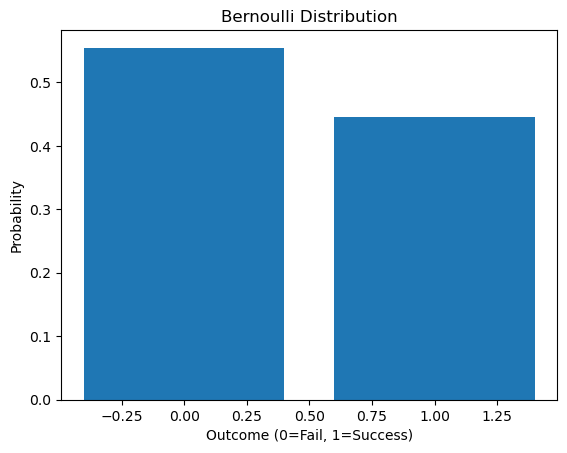

In [35]:
df["status_binary"] = df["transaction_status"].apply(
    lambda x: 1 if x == "Success" else 0
)

p_success = df["status_binary"].mean()
print("Probability of Success:", p_success)

x_vals = [0, 1]
pmf_vals = [1 - p_success, p_success]

plt.figure()
plt.bar(x_vals, pmf_vals)
plt.title("Bernoulli Distribution")
plt.xlabel("Outcome (0=Fail, 1=Success)")
plt.ylabel("Probability")
plt.show()

## BINOMIAL DISTRIBUTION

binomial [0.01612724 0.09068268 0.21853039 0.292568   0.23501364 0.11326887
 0.03032882 0.00348036]


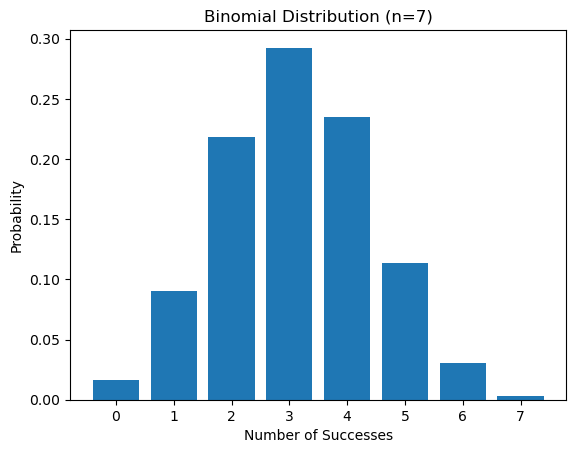

In [65]:
n = 7
k = np.arange(0, n+1)
binom_pmf = binom.pmf(k, n, p_success)
print("binomial",binom_pmf)
plt.figure()
plt.bar(k, binom_pmf)
plt.title("Binomial Distribution (n=7)")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.show()

## POISSON DISTRIBUTION

Lambda (Poisson): 2.8545454545454545


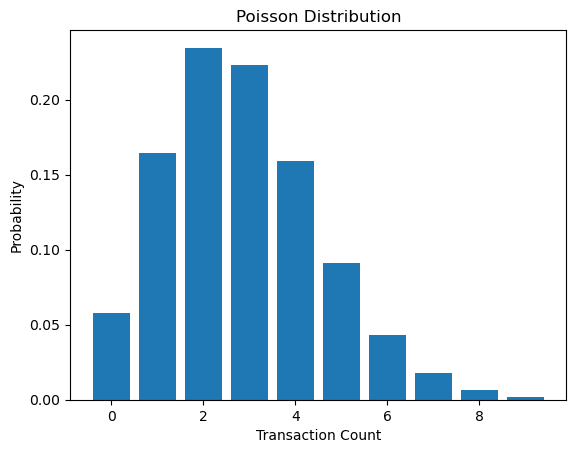

In [41]:
lambda_poisson = df["transaction_count"].mean()
print("Lambda (Poisson):", lambda_poisson)

k_vals = np.arange(0, df["transaction_count"].max()+1)
poisson_pmf = poisson.pmf(k_vals, lambda_poisson)

plt.figure()
plt.bar(k_vals, poisson_pmf)
plt.title("Poisson Distribution")
plt.xlabel("Transaction Count")
plt.ylabel("Probability")
plt.show()

## HISTOGRAM OF TRANSACTION AMOUNT

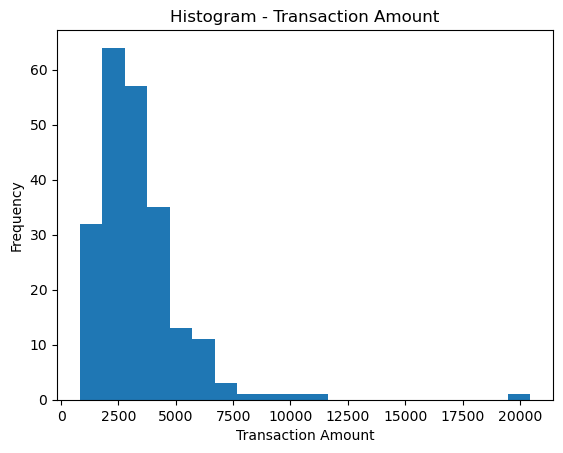

In [44]:
plt.figure()
plt.hist(df["transaction_amount"], bins=20)
plt.title("Histogram - Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

## Q-Q PLOT (Normality Check)

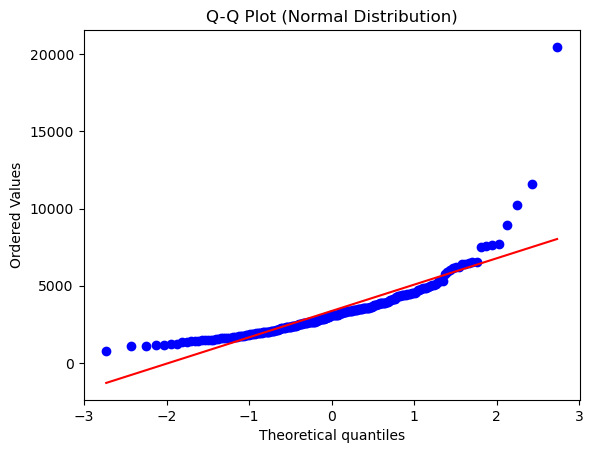

In [47]:
plt.figure()
stats.probplot(df["transaction_amount"], dist="norm", plot=plt)
plt.title("Q-Q Plot (Normal Distribution)")
plt.show()

## LOG-NORMAL DISTRIBUTION FIT

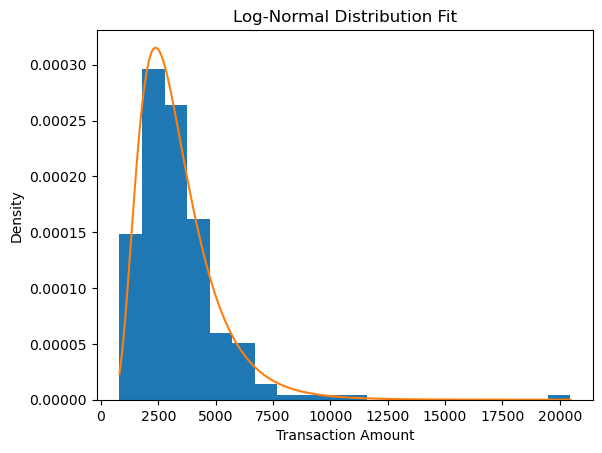

In [50]:
shape, loc, scale = lognorm.fit(df["transaction_amount"], floc=0)

x = np.linspace(min(df["transaction_amount"]),
                max(df["transaction_amount"]), 1000)

pdf_lognorm = lognorm.pdf(x, shape, loc, scale)

plt.figure()
plt.hist(df["transaction_amount"], bins=20, density=True)
plt.plot(x, pdf_lognorm)
plt.title("Log-Normal Distribution Fit")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()

## PDF AND CDF

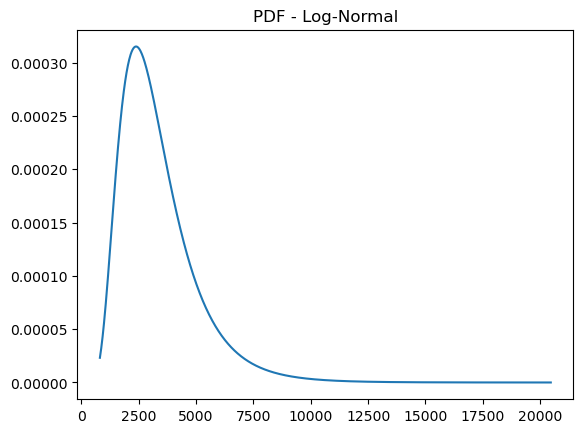

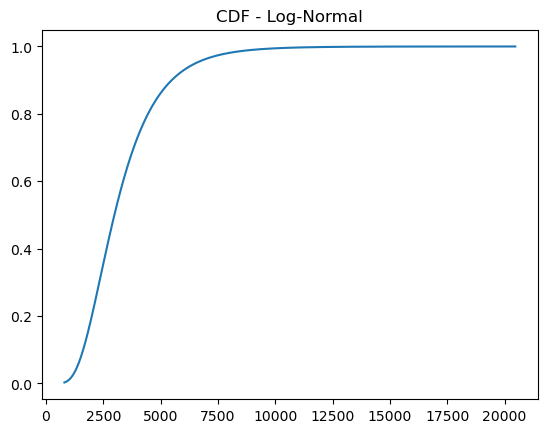

In [53]:
cdf_lognorm = lognorm.cdf(x, shape, loc, scale)

plt.figure()
plt.plot(x, pdf_lognorm)
plt.title("PDF - Log-Normal")
plt.show()

plt.figure()
plt.plot(x, cdf_lognorm)
plt.title("CDF - Log-Normal")
plt.show()

## BOX-COX TRANSFORMATION

Box-Cox Lambda: -0.18083391951050778


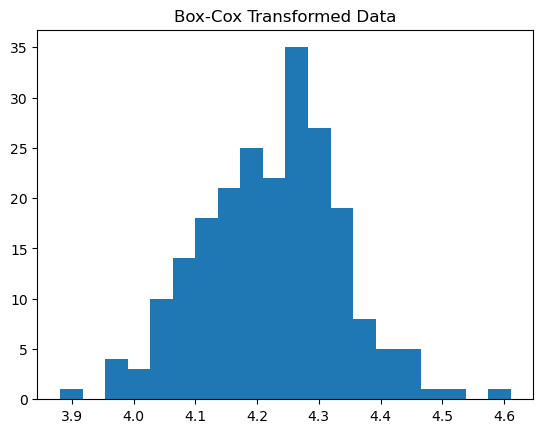

In [57]:
boxcox_transformed, lambda_bc = stats.boxcox(
    df["transaction_amount"]
)

print("Box-Cox Lambda:", lambda_bc)

plt.figure()
plt.hist(boxcox_transformed, bins=20)
plt.title("Box-Cox Transformed Data")
plt.show()

## Z-SCORE CALCULATION

In [60]:
df["z_score"] = zscore(df["transaction_amount"])

print(df[["transaction_amount", "z_score"]].head())

# Probability of transaction amount > 5000
mean = df["transaction_amount"].mean()
std = df["transaction_amount"].std()

z_val = (5000 - mean) / std
prob = 1 - stats.norm.cdf(z_val)

print("Probability(Transaction > 5000):", prob)

   transaction_amount   z_score
0             3821.34  0.230240
1             2781.84 -0.294446
2             4120.97  0.381477
3             6383.78  1.523626
4             2651.61 -0.360179
Probability(Transaction > 5000): 0.20517209567554384


## POWER LAW CHECK (Log-Log Plot)

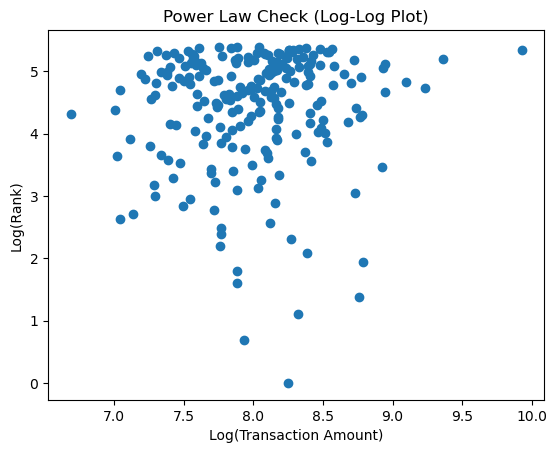

In [63]:
log_x = np.log(df["transaction_amount"])
log_y = np.log(np.arange(1, len(log_x)+1))

plt.figure()
plt.scatter(log_x, log_y)
plt.title("Power Law Check (Log-Log Plot)")
plt.xlabel("Log(Transaction Amount)")
plt.ylabel("Log(Rank)")
plt.show()

## Final Conclusion 
- The transaction amount data is positively skewed and does not follow a normal distribution; the Log-Normal distribution best fits it due to its heavy right tail and non-negative nature.
- Transaction counts follow a Poisson distribution since they represent discrete event occurrences over time. Transaction status is best modeled using Bernoulli and Binomial distributions. 
- These models provide more accurate probability estimates and support better revenue forecasting, demand planning, and risk management decisions.